# Introduction

L'objectif de ce mini-projet est de modéliser le mouvement rétrograde de Mars vu depuis la Terre tous les deux ans.

Pour se faire, nous allons tout d'abord représenter ce mouvement sur un graphe avec les données fournies, ces données ont été mesuré expérimentalement. Elles correspondent à la latitude et longtitude en décimal et en degré mètre seconde en fonction de la date. Ces données ont été récupéré chaque jours entre le premier mars 2015 et le 16 août 2017.
Ensuite nous allons calculer théoriquement la trajectoire que devrait effectuer Mars entre ces deux dates et la représenter sur un graphe comme précédement.

Pour finir, nous allons comparer, grâce aux graphes obtenus, la cohérence entre la théorie et l'observation.

Le modèle utilisé est un modèle bidimentionnel du mouvement de la Terre et de Mars autour du Soleil. On utilise ce modèle pour pouvoir calculer la longitude de Mars vue depuis la Terre en fonction du temps.

On considère le mouvement des deux planètes comme circulaire et uniforme et contenu dans le plan de l'ecliptique. 
On pourra donc utiliser pour le calcul numérique les équations du mouvement pour un mouvement circulaire.

#### Equations du mouvement pour un mouvement circulaire uniforme de rayon R , de période T et de phase à l'origine $\phi$. 
X(t)=Rcos(($\frac{2\pi}{T}$)*t+$\phi$)

Y(t)=Rsin(($\frac{2\pi}{T}$)*t+$\phi$)

# Résolution du problème

## Partie expérimentale

### On importe les biliothèques utiles pour résoudre le problème

In [1]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### On télécharge le fichier contenant les données expérimentales

In [2]:
DataMars=pd.read_csv("DataMars.csv", comment="#")

print(DataMars)

    Target        Date Longitude (d:m:s)  Longitude (decimal)   
0     Mars  2015-03-01      6 41 13.6229             6.687117  \
1     Mars  2015-03-02       7 27 2.2465             7.450624   
2     Mars  2015-03-03      8 12 48.4061             8.213446   
3     Mars  2015-03-04      8 58 32.0880             8.975580   
4     Mars  2015-03-05      9 44 13.2819             9.737023   
..     ...         ...               ...                  ...   
895   Mars  2017-08-12    134 12 33.4912           134.209303   
896   Mars  2017-08-13    134 50 55.6253           134.848785   
897   Mars  2017-08-14    135 29 17.1024           135.488084   
898   Mars  2017-08-15     136 7 37.9459           136.127207   
899   Mars  2017-08-16    136 45 58.1727           136.766159   

    Latitude (d:m:s)  Latitude (decimal)  
0     -00 29 17.9130           -0.488309  
1     -00 28 35.5370           -0.476538  
2     -00 27 53.1443           -0.464762  
3     -00 27 10.7400           -0.452983  
4   

### On récupère les données qui nous intéressent

Seule la longitude nous intéresse.
On sélectionne celle en décimal car cela permet de simplifier le calcul. En effet, nous calculerons théoriquement la longitude directement en décimal.

In [3]:
longitude_MT=DataMars['Longitude (decimal)']
dates_MT=pd.to_datetime(DataMars['Date'])

### On sélectionne les données qui nous intéressent

Ces données sont les dates entourant le 16 mai 2016, la date où on peut observer le centre de la boucle. En effet, le mouvement qui nous intéresse est la boucle et non pas la trajectoire de Mars en entier pendant 2 ans.

In [4]:
dates_MT_selec=dates_MT[300:612]
longitude_MT_selec=longitude_MT[300:612]

### On plot les données qu'on a sélectionné

Text(0.5, 1.0, 'Longitude de Mars par rapport au centre de la Terre en fonction de la date (données expérimentales)')

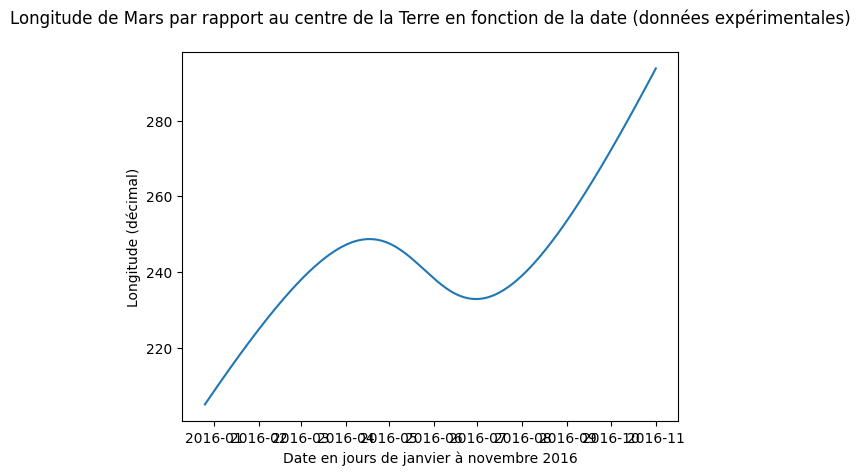

In [5]:
plt.plot(dates_MT_selec,longitude_MT_selec)
plt.ylabel("Longitude (décimal)")
plt.xlabel("Date en jours de janvier à novembre 2016")
plt.title("Longitude de Mars par rapport au centre de la Terre en fonction de la date (données expérimentales)",pad=20)

## Partie théorique

### Expression de l'angle $\phi$ qui correspond à la longitude 

### Données numériques utiles

In [6]:
#Terre
rayon_orb_T=1 #ua
periode_T=365.256 #jours

#Mars
rayon_orb_M=1.52371 #ua
periode_M=686.885 #jours

### Nombre approximatif de jour entre mars 2015 et août 2017

In [7]:
np_temps=np.arange(0,900,1)

### Equation du mouvement pour la Terre

In [8]:
X_T=rayon_orb_T*np.cos((2*mt.pi/periode_T)*np_temps+158.5*np.pi/180)
Y_T=rayon_orb_T*np.sin((2*mt.pi/periode_T)*np_temps+158.5*np.pi/180)

### Equation du mouvement pour Mars

In [9]:
X_M=rayon_orb_M*np.cos((2*mt.pi/periode_M)*np_temps+np.pi/2)
Y_M=rayon_orb_M*np.sin((2*mt.pi/periode_M)*np_temps+np.pi/2)

### Finalement

In [14]:
phi=((np.arctan2(Y_M-Y_T,X_M-X_T)+np.pi)*180)/np.pi

## On plot les données trouvées théoriquement

Text(0.5, 1.0, 'Longitude de Mars par rapport au centre de la Terre en fonction de la date (données théoriques)')

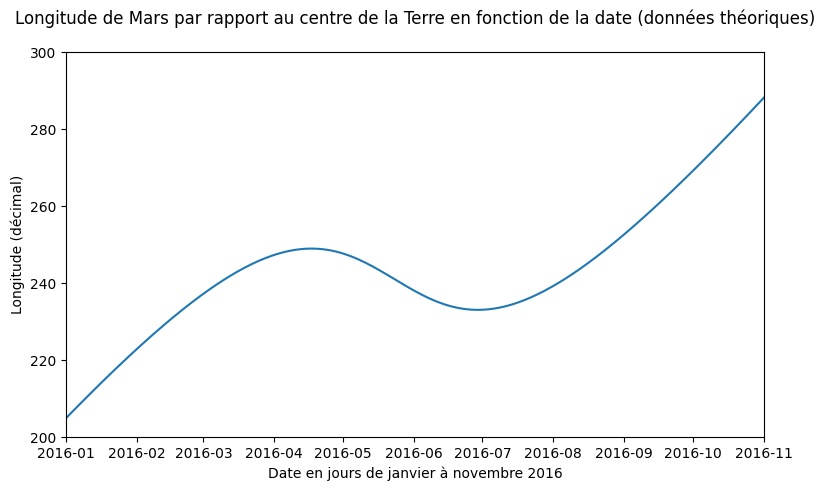

In [15]:
# On fait en sorte que le 16 mai 2016 théorique et expérimentale correspondent au même point sur le graphique
#A t=633, on remarque que les données expérimentales et théoriques concordent pour le 25 mai 2016

#On met l'origine des temps à 633 jours avant le 25 mai (la date obtenue ne change rien, ce qui compte c'est la concordance des donnée)
new_origine_t = np.datetime64('2016-05-25') - np.timedelta64(633, 'D')
temps_date = pd.to_datetime(np_temps, unit = 'D', origin = new_origine_t)

plt.figure(figsize=(9,5)) # étirer l'axe des abscisses pour plus de lisibilité
plt.plot(temps_date,phi)

plt.ylim(200,300)
plt.xlim(pd.Timestamp("2016-01-01"),pd.Timestamp("2016-11-01"))

plt.ylabel("Longitude (décimal)")
plt.xlabel("Date en jours de janvier à novembre 2016")
plt.title("Longitude de Mars par rapport au centre de la Terre en fonction de la date (données théoriques)",pad=20)

## Comparaison des graphes obtenus expérimentalement et théoriquement

(16801.0, 17106.0)

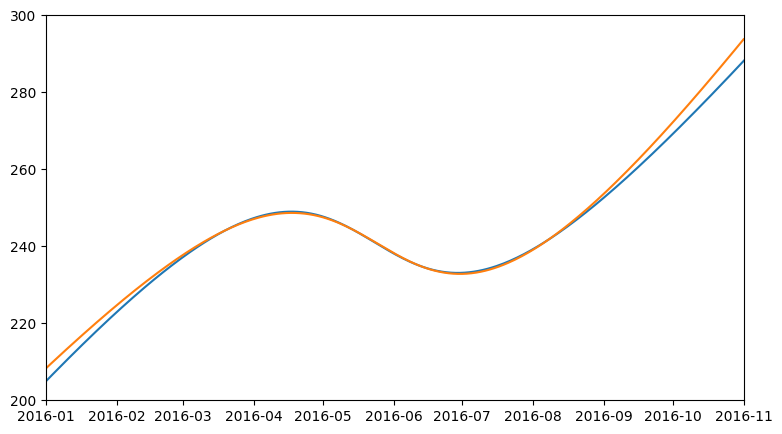

In [16]:
plt.figure(figsize=(9,5))
plt.plot(temps_date,phi)
plt.plot(dates_MT_selec,longitude_MT_selec)
plt.ylim(200,300)
plt.xlim(pd.Timestamp("2016-01-01"),pd.Timestamp("2016-11-01"))

On remarque une légère différence entre les deux courbes obtenues.
Cela peut être dû au fait de l'hypothèse du mouvement circulaire des planètes qui ont en réalité une trajectoire légèrement eliptique.